# Computer Vision Nanodegree

## Project: Image Captioning

---

In this notebook, you will train your CNN-RNN model.  

You are welcome and encouraged to try out many different architectures and hyperparameters when searching for a good model.

This does have the potential to make the project quite messy!  Before submitting your project, make sure that you clean up:
- the code you write in this notebook.  The notebook should describe how to train a single CNN-RNN architecture, corresponding to your final choice of hyperparameters.  You should structure the notebook so that the reviewer can replicate your results by running the code in this notebook.  
- the output of the code cell in **Step 2**.  The output should show the output obtained when training the model from scratch.

This notebook **will be graded**.  

Feel free to use the links below to navigate the notebook:
- [Step 1](#step1): Training Setup
- [Step 2](#step2): Train your Model
- [Step 3](#step3): (Optional) Validate your Model

<a id='step1'></a>
## Step 1: Training Setup

In this step of the notebook, you will customize the training of your CNN-RNN model by specifying hyperparameters and setting other options that are important to the training procedure.  The values you set now will be used when training your model in **Step 2** below.

You should only amend blocks of code that are preceded by a `TODO` statement.  **Any code blocks that are not preceded by a `TODO` statement should not be modified**.

### Task #1

Begin by setting the following variables:
- `batch_size` - the batch size of each training batch.  It is the number of image-caption pairs used to amend the model weights in each training step. 
- `vocab_threshold` - the minimum word count threshold.  Note that a larger threshold will result in a smaller vocabulary, whereas a smaller threshold will include rarer words and result in a larger vocabulary.  
- `vocab_from_file` - a Boolean that decides whether to load the vocabulary from file. 
- `embed_size` - the dimensionality of the image and word embeddings.  
- `hidden_size` - the number of features in the hidden state of the RNN decoder.  
- `num_epochs` - the number of epochs to train the model.  We recommend that you set `num_epochs=3`, but feel free to increase or decrease this number as you wish.  [This paper](https://arxiv.org/pdf/1502.03044.pdf) trained a captioning model on a single state-of-the-art GPU for 3 days, but you'll soon see that you can get reasonable results in a matter of a few hours!  (_But of course, if you want your model to compete with current research, you will have to train for much longer._)
- `save_every` - determines how often to save the model weights.  We recommend that you set `save_every=1`, to save the model weights after each epoch.  This way, after the `i`th epoch, the encoder and decoder weights will be saved in the `models/` folder as `encoder-i.pkl` and `decoder-i.pkl`, respectively.
- `print_every` - determines how often to print the batch loss to the Jupyter notebook while training.  Note that you **will not** observe a monotonic decrease in the loss function while training - this is perfectly fine and completely expected!  You are encouraged to keep this at its default value of `100` to avoid clogging the notebook, but feel free to change it.
- `log_file` - the name of the text file containing - for every step - how the loss and perplexity evolved during training.

If you're not sure where to begin to set some of the values above, you can peruse [this paper](https://arxiv.org/pdf/1502.03044.pdf) and [this paper](https://arxiv.org/pdf/1411.4555.pdf) for useful guidance!  **To avoid spending too long on this notebook**, you are encouraged to consult these suggested research papers to obtain a strong initial guess for which hyperparameters are likely to work best.  Then, train a single model, and proceed to the next notebook (**3_Inference.ipynb**).  If you are unhappy with your performance, you can return to this notebook to tweak the hyperparameters (and/or the architecture in **model.py**) and re-train your model.

### Question 1

**Question:** Describe your CNN-RNN architecture in detail.  With this architecture in mind, how did you select the values of the variables in Task 1?  If you consulted a research paper detailing a successful implementation of an image captioning model, please provide the reference.

**Answer:** CNN architechture => Resnet50 (pretrained)

CNN input => image dimension (224x224x3) 
            
CNN output => fully connected layer of dimension (embed_size)
            
RNN architechture => LSTM <num_layers =1 [link of research paper : https://arxiv.org/pdf/1411.4555.pdf]  >

RNN input => a sequence(tensor) where each input has dimension (embed_size)

RNN output => scores(dimension = vocab_size) for each word to be predicted 

Selection of parameters for Task1 :

batch_size = 64 [ link of research paper : https://arxiv.org/pdf/1502.03044.pdf  ]

hidden_size = 512 [link of research paper : https://arxiv.org/pdf/1411.4555.pdf ]

vocab_threshold = 5 [link of research paper : https://arxiv.org/pdf/1411.4555.pdf ]

embed_size = 512 [link of research paper : https://arxiv.org/pdf/1411.4555.pdf ]

### (Optional) Task #2

Note that we have provided a recommended image transform `transform_train` for pre-processing the training images, but you are welcome (and encouraged!) to modify it as you wish.  When modifying this transform, keep in mind that:
- the images in the dataset have varying heights and widths, and 
- if using a pre-trained model, you must perform the corresponding appropriate normalization.

### Question 2

**Question:** How did you select the transform in `transform_train`?  If you left the transform at its provided value, why do you think that it is a good choice for your CNN architecture?

**Answer:** 1)It is a good choice for CNN architechture as horizontal flipping helps to prevent overfitting 

2)Also  mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225] are the mean and std of Imagenet dataset on which the pytorch models were pretrained 

### Task #3

Next, you will specify a Python list containing the learnable parameters of the model.  For instance, if you decide to make all weights in the decoder trainable, but only want to train the weights in the embedding layer of the encoder, then you should set `params` to something like:
```
params = list(decoder.parameters()) + list(encoder.embed.parameters()) 
```

### Question 3

**Question:** How did you select the trainable parameters of your architecture?  Why do you think this is a good choice?

**Answer:** DecoderRNN trainable parametrs => word_embeddings,fully connected layer weights , long term memory and short term memory of LSTM

word_embeddings = They are important since cosine of angle between two words can give us the extent of similarity between two words. 
[ link for reference :  https://pytorch.org/tutorials/beginner/nlp/word_embeddings_tutorial.html?highlight=word%20embeddings]

Both long and short term memory in LSTM can help us to use previously seen data and use it to predict unseen data
at diffent time steps

fully connected layer weights = These weights are applied at  output of LSTM for output_dim =vocab_size

Encoder_CNN parameters = fully connected layer

This is a good choice since we have used the concept of transfer learning(by using pretrained Resnet 50) here which saves computational cost and time

### Task #4

Finally, you will select an [optimizer](http://pytorch.org/docs/master/optim.html#torch.optim.Optimizer).

### Question 4

**Question:** How did you select the optimizer used to train your model?

**Answer:** Adam Optimiser since it has the option for adaptive learning rate . It is a combination of gradient descent with momentum and RMS Prop . 

Momentum helps in faster convergence and Rms prop helps in normalizing the steps taken during gradient descent.

[link for reference: https://arxiv.org/pdf/1502.03044.pdf]

In [1]:
import torch
import torch.nn as nn
from torchvision import transforms
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO
from data_loader import get_loader
from model import EncoderCNN, DecoderRNN
import math
!pip install nltk
import nltk
nltk.download('punkt')

## TODO #1: Select appropriate values for the Python variables below.
batch_size = 64          # batch size
vocab_threshold = 5       # minimum word count threshold
vocab_from_file = True    # if True, load existing vocab file

"""
The final thing to mention is the vocab_from_file argument that is supplied when creating a data loader. To understand this argument, note that when you create a new data loader, the vocabulary (data_loader.dataset.vocab) is saved as a pickle file in the project folder, with filename vocab.pkl.

If you are still tweaking the value of the vocab_threshold argument, you must set vocab_from_file=False to have your changes take effect.

But once you are happy with the value that you have chosen for the vocab_threshold argument, you need only run the data loader one more time with your chosen vocab_threshold to save the new vocabulary to file. Then, you can henceforth set vocab_from_file=True to load the vocabulary from file and speed the instantiation of the data loader. Note that building the vocabulary from scratch is the most time-consuming part of instantiating the data loader, and so you are strongly encouraged to set vocab_from_file=True as soon as you are able.

Note that if vocab_from_file=True, then any supplied argument for vocab_threshold when instantiating the data loader is completely ignored.
"""




embed_size = 512          # dimensionality of image and word embeddings
hidden_size = 512          # number of features in hidden state of the RNN decoder
num_epochs = 10            # number of training epochs
save_every = 1             # determines frequency of saving model weights
print_every = 100          # determines window for printing average loss
log_file = 'training_log.txt'       # name of file with saved training loss and perplexity

# (Optional) TODO #2: Amend the image transform below.
transform_train = transforms.Compose([ 
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])

# Build data loader.
data_loader = get_loader(transform=transform_train,
                         mode='train',
                         batch_size=batch_size,
                         vocab_threshold=vocab_threshold,
                         vocab_from_file=vocab_from_file)

# The size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

# Initialize the encoder and decoder. 
encoder = EncoderCNN(embed_size)
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)

# Move models to GPU if CUDA is available. 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder.to(device)
decoder.to(device)

# Define the loss function. 
criterion = nn.CrossEntropyLoss().cuda() if torch.cuda.is_available() else nn.CrossEntropyLoss()

# TODO #3: Specify the learnable parameters of the model.
params = list(decoder.parameters()) + list(encoder.embed.parameters()) 
#list((decoder.word_embeddings.parameters(),decoder.lstm.parameters(),decoder.fc.parameters())) + list(encoder.embed.parameters()) 

# TODO #4: Define the optimizer.
optimizer = torch.optim.Adam(params, lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)


# Set the total number of training steps per epoch.
total_step = math.ceil(len(data_loader.dataset.caption_lengths) / data_loader.batch_sampler.batch_size)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Vocabulary successfully loaded from vocab.pkl file!
loading annotations into memory...
Done (t=0.93s)
creating index...


  0%|          | 766/414113 [00:00<01:53, 3627.52it/s]

index created!
Obtaining caption lengths...


100%|██████████| 414113/414113 [01:34<00:00, 4370.77it/s]


<a id='step2'></a>
## Step 2: Train your Model

Once you have executed the code cell in **Step 1**, the training procedure below should run without issue.  

It is completely fine to leave the code cell below as-is without modifications to train your model.  However, if you would like to modify the code used to train the model below, you must ensure that your changes are easily parsed by your reviewer.  In other words, make sure to provide appropriate comments to describe how your code works!  

You may find it useful to load saved weights to resume training.  In that case, note the names of the files containing the encoder and decoder weights that you'd like to load (`encoder_file` and `decoder_file`).  Then you can load the weights by using the lines below:

```python
# Load pre-trained weights before resuming training.
encoder.load_state_dict(torch.load(os.path.join('./models', encoder_file)))
decoder.load_state_dict(torch.load(os.path.join('./models', decoder_file)))
```

While trying out parameters, make sure to take extensive notes and record the settings that you used in your various training runs.  In particular, you don't want to encounter a situation where you've trained a model for several hours but can't remember what settings you used :).

### A Note on Tuning Hyperparameters

To figure out how well your model is doing, you can look at how the training loss and perplexity evolve during training - and for the purposes of this project, you are encouraged to amend the hyperparameters based on this information.  

However, this will not tell you if your model is overfitting to the training data, and, unfortunately, overfitting is a problem that is commonly encountered when training image captioning models.  

For this project, you need not worry about overfitting. **This project does not have strict requirements regarding the performance of your model**, and you just need to demonstrate that your model has learned **_something_** when you generate captions on the test data.  For now, we strongly encourage you to train your model for the suggested 3 epochs without worrying about performance; then, you should immediately transition to the next notebook in the sequence (**3_Inference.ipynb**) to see how your model performs on the test data.  If your model needs to be changed, you can come back to this notebook, amend hyperparameters (if necessary), and re-train the model.

That said, if you would like to go above and beyond in this project, you can read about some approaches to minimizing overfitting in section 4.3.1 of [this paper](http://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=7505636).  In the next (optional) step of this notebook, we provide some guidance for assessing the performance on the validation dataset.

In [2]:
import torch.utils.data as data
import numpy as np
import os
import requests
import time

# Open the training log file.
f = open(log_file, 'w')

old_time = time.time()
response = requests.request("GET", 
                            "http://metadata.google.internal/computeMetadata/v1/instance/attributes/keep_alive_token", 
                            headers={"Metadata-Flavor":"Google"})

for epoch in range(1, num_epochs+1):
    
    for i_step in range(1, total_step+1):
        
        if time.time() - old_time > 60:
            old_time = time.time()
            requests.request("POST", 
                             "https://nebula.udacity.com/api/v1/remote/keep-alive", 
                             headers={'Authorization': "STAR " + response.text})
        
        # Randomly sample a caption length, and sample indices with that length.
        indices = data_loader.dataset.get_train_indices()
        # Create and assign a batch sampler to retrieve a batch with the sampled indices.
        new_sampler = data.sampler.SubsetRandomSampler(indices=indices)
        data_loader.batch_sampler.sampler = new_sampler
        
        # Obtain the batch.
        images, captions = next(iter(data_loader))

        # Move batch of images and captions to GPU if CUDA is available.
        images = images.to(device)
        captions = captions.to(device)
        
        # Zero the gradients.
        decoder.zero_grad()
        encoder.zero_grad()
        
        # Pass the inputs through the CNN-RNN model.
        features = encoder(images)
        outputs = decoder(features, captions)
        
        # Calculate the batch loss.
        loss = criterion(outputs.view(-1, vocab_size), captions.view(-1))
        
        # Backward pass.
        loss.backward()
        
        # Update the parameters in the optimizer.
        optimizer.step()
            
        # Get training statistics.
        stats = 'Epoch [%d/%d], Step [%d/%d], Loss: %.4f, Perplexity: %5.4f' % (epoch, num_epochs, i_step, total_step, loss.item(), np.exp(loss.item()))
        
        # Print training statistics (on same line).
        print('\r' + stats, end="")
        sys.stdout.flush()
        
        # Print training statistics to file.
        f.write(stats + '\n')
        f.flush()
        
        # Print training statistics (on different line).
        if i_step % print_every == 0:
            print('\r' + stats)
            
    # Save the weights.
    if epoch % save_every == 0:
        torch.save(decoder.state_dict(), os.path.join('./models', 'decoder-%d.pkl' % epoch))
        torch.save(encoder.state_dict(), os.path.join('./models', 'encoder-%d.pkl' % epoch))

# Close the training log file.
f.close()

Epoch [1/10], Step [100/6471], Loss: 3.7569, Perplexity: 42.8136
Epoch [1/10], Step [200/6471], Loss: 3.5162, Perplexity: 33.6551
Epoch [1/10], Step [300/6471], Loss: 3.1523, Perplexity: 23.3894
Epoch [1/10], Step [400/6471], Loss: 3.3457, Perplexity: 28.38121
Epoch [1/10], Step [500/6471], Loss: 3.0841, Perplexity: 21.8479
Epoch [1/10], Step [600/6471], Loss: 2.8567, Perplexity: 17.4039
Epoch [1/10], Step [700/6471], Loss: 2.8323, Perplexity: 16.9846
Epoch [1/10], Step [800/6471], Loss: 2.7560, Perplexity: 15.7360
Epoch [1/10], Step [900/6471], Loss: 2.7715, Perplexity: 15.9821
Epoch [1/10], Step [1000/6471], Loss: 3.0234, Perplexity: 20.5609
Epoch [1/10], Step [1100/6471], Loss: 2.5122, Perplexity: 12.3316
Epoch [1/10], Step [1200/6471], Loss: 2.6947, Perplexity: 14.8012
Epoch [1/10], Step [1300/6471], Loss: 2.5350, Perplexity: 12.6165
Epoch [1/10], Step [1400/6471], Loss: 2.6507, Perplexity: 14.1645
Epoch [1/10], Step [1500/6471], Loss: 2.4193, Perplexity: 11.2385
Epoch [1/10], Step

KeyboardInterrupt: 

<a id='step3'></a>
## Step 3: (Optional) Validate your Model

To assess potential overfitting, one approach is to assess performance on a validation set.  If you decide to do this **optional** task, you are required to first complete all of the steps in the next notebook in the sequence (**3_Inference.ipynb**); as part of that notebook, you will write and test code (specifically, the `sample` method in the `DecoderRNN` class) that uses your RNN decoder to generate captions.  That code will prove incredibly useful here. 

If you decide to validate your model, please do not edit the data loader in **data_loader.py**.  Instead, create a new file named **data_loader_val.py** containing the code for obtaining the data loader for the validation data.  You can access:
- the validation images at filepath `'/opt/cocoapi/images/train2014/'`, and
- the validation image caption annotation file at filepath `'/opt/cocoapi/annotations/captions_val2014.json'`.

The suggested approach to validating your model involves creating a json file such as [this one](https://github.com/cocodataset/cocoapi/blob/master/results/captions_val2014_fakecap_results.json) containing your model's predicted captions for the validation images.  Then, you can write your own script or use one that you [find online](https://github.com/tylin/coco-caption) to calculate the BLEU score of your model.  You can read more about the BLEU score, along with other evaluation metrics (such as TEOR and Cider) in section 4.1 of [this paper](https://arxiv.org/pdf/1411.4555.pdf).  For more information about how to use the annotation file, check out the [website](http://cocodataset.org/#download) for the COCO dataset.

In [17]:
# (Optional) TODO: Validate your model.
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO
from data_loader_val import get_loader
from torchvision import transforms

# TODO #1: Define a transform to pre-process the testing images.
transform_val = transforms.Compose([ 
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])

#-#-#-# Do NOT modify the code below this line. #-#-#-#

# Create the data loader.
data_loader = get_loader(transform=transform_val,    
                         mode='val')

Vocabulary successfully loaded from vocab.pkl file!


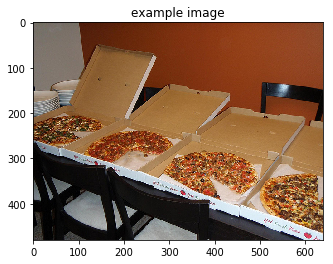

image_id :  tensor([ 60641])


In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Obtain sample image before and after pre-processing.
orig_image, image, image_id = next(iter(data_loader))

# Visualize sample image, before pre-processing.
plt.imshow(np.squeeze(orig_image))
plt.title('example image')
plt.show()
print("image_id : ",image_id)

In [19]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [20]:
# Watch for any changes in model.py, and re-load it automatically.
% load_ext autoreload
% autoreload 2

import os
import torch
from model import EncoderCNN, DecoderRNN

# TODO #2: Specify the saved models to load. !!!! Change no. acc to num_epochs
encoder_file = 'encoder-3.pkl'
decoder_file = 'decoder-3.pkl'
               

# TODO #3: Select appropriate values for the Python variables below.
embed_size = 512
hidden_size = 512

# The size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

# Initialize the encoder and decoder, and set each to inference mode.
encoder = EncoderCNN(embed_size)
encoder.eval()
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)
decoder.eval()

# Load the trained weights.
encoder.load_state_dict(torch.load(os.path.join('./models', encoder_file)))
decoder.load_state_dict(torch.load(os.path.join('./models', decoder_file)))

# Move models to GPU if CUDA is available.
encoder.to(device)
decoder.to(device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


DecoderRNN(
  (lstm): LSTM(512, 512, batch_first=True)
  (fc): Linear(in_features=512, out_features=8855, bias=True)
  (word_embeddings): Embedding(8855, 512)
)

In [21]:
# Move image Pytorch Tensor to GPU if CUDA is available.
image = image.to(device)

# Obtain the embedded image features.
features = encoder(image).unsqueeze(1)

# Pass the embedded image features through the model to get a predicted caption.
output = decoder.sample(features)
print('example output:', output)

assert (type(output)==list), "Output needs to be a Python list" 
assert all([type(x)==int for x in output]), "Output should be a list of integers." 
assert all([x in data_loader.dataset.vocab.idx2word for x in output]), "Each entry in the output needs to correspond to an integer that indicates a token in the vocabulary."

example output: [0, 3, 2051, 467, 21, 3, 210, 13, 468, 4329, 18, 1, 1, 1, 6, 3, 2051, 18, 1, 1]


In [22]:
def listToString(s):  
    str1 = " "
    str1 = (str1.join(s)) 
    
    return str1

def clean_sentence(output):
    sentence_list = []
    for i in range(len(output)):
        if ( output[i]==0 or output[i]==1):
            continue
        sentence_list.append(data_loader.dataset.vocab.idx2word[output[i]] )
    sentence = listToString(sentence_list)   
    
    return sentence

print(clean_sentence(output))

a pizza buffet with a lot of different toppings . and a pizza .


In [23]:
# Trying with a batch now
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO
from data_loader_val2 import get_loader
from torchvision import transforms

# TODO #1: Define a transform to pre-process the testing images.
transform_val = transforms.Compose([ 
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])

#-#-#-# Do NOT modify the code below this line. #-#-#-#

# Create the data loader.
data_loader = get_loader(transform=transform_val,  
                         batch_size = 64,
                         mode='val2')


Vocabulary successfully loaded from vocab.pkl file!


In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Obtain sample image before and after pre-processing.
image, image_id = next(iter(data_loader))

# Visualize sample image, before pre-processing.

print("image_id.shape : ",image_id.shape)

image_id.shape :  torch.Size([64])


In [25]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [29]:
# Watch for any changes in model.py, and re-load it automatically.
% load_ext autoreload
% autoreload 2

import os
import torch
from model import EncoderCNN, DecoderRNN

# TODO #2: Specify the saved models to load. !!!! Change no. acc to num_epochs
encoder_file = 'encoder-3.pkl'
decoder_file = 'decoder-3.pkl'
               

# TODO #3: Select appropriate values for the Python variables below.
embed_size = 512
hidden_size = 512

# The size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

# Initialize the encoder and decoder, and set each to inference mode.
encoder = EncoderCNN(embed_size)
encoder.eval()
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)
decoder.eval()

# Load the trained weights.
encoder.load_state_dict(torch.load(os.path.join('./models', encoder_file)))
decoder.load_state_dict(torch.load(os.path.join('./models', decoder_file)))

# Move models to GPU if CUDA is available.
encoder.to(device)
decoder.to(device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


DecoderRNN(
  (lstm): LSTM(512, 512, batch_first=True)
  (fc): Linear(in_features=512, out_features=8855, bias=True)
  (word_embeddings): Embedding(8855, 512)
)

In [30]:
# Move image Pytorch Tensor to GPU if CUDA is available.


def listToString(s):  
    str1 = " "
    str1 = (str1.join(s)) 
    
    return str1

def clean_sentence(output):
    sentence_list = []
    for i in range(len(output)):
        if ( output[i]==0 or output[i]==1):
            continue
        sentence_list.append(data_loader.dataset.vocab.idx2word[output[i]] )
    sentence = listToString(sentence_list)   
    
    return sentence



image = image.to(device)

# Obtain the embedded image features.
features = encoder(image).unsqueeze(1)

print("features.shape : ", features.shape) #op=> features.shape :  torch.Size([64, 1, 512])

# Pass the embedded image features through the model to get a predicted caption.
# We will now create a json file
list_of_predictions =[]
for i in range (len(features)): # iterating over a batch 
    output = decoder.sample(features[i].unsqueeze(0))
    
    output_sen = clean_sentence(output)
    print('example output:', output_sen)
    image_id_out = image_id[i].item()
    a = {"image_id": image_id_out, "caption": output_sen}
    list_of_predictions.append(a)
    
print('example output:', output[0])

assert (type(output)==list), "Output needs to be a Python list" 
assert all([type(x)==int for x in output]), "Output should be a list of integers." 
assert all([x in data_loader.dataset.vocab.idx2word for x in output]), "Each entry in the output needs to correspond to an integer that indicates a token in the vocabulary."

features.shape :  torch.Size([64, 1, 512])
example output: a living room with a couch , coffee table and armchair . and a white couch
example output: a man is eating a piece of pizza in a restaurant . and
example output: a fire hydrant on the sidewalk near a building . and a
example output: a kitchen with a sink and a microwave . .
example output: a man and a woman are playing video games together . and
example output: a man in a suit and tie is standing on a sidewalk .
example output: a vase of flowers sitting on a table . and a white door
example output: a man on a motorcycle with a sidecar on the handlebar .
example output: a bicycle parked next to a wooden bench .
example output: a man standing in a kitchen with a bunch of food in it .
example output: a woman standing in a kitchen with a refrigerator . .
example output: a man in a kitchen is cooking some food .
example output: a kitchen with a stove and a sink .
example output: a kitchen with a sink , stove and refrigerator . . .
e

In [31]:
print("list of predictions : ",list_of_predictions)

list of predictions :  [{'image_id': 57870, 'caption': 'a living room with a couch , coffee table and armchair . and a white couch'}, {'image_id': 384029, 'caption': 'a man is eating a piece of pizza in a restaurant . and'}, {'image_id': 222016, 'caption': 'a fire hydrant on the sidewalk near a building . and a'}, {'image_id': 520950, 'caption': 'a kitchen with a sink and a microwave . .'}, {'image_id': 69675, 'caption': 'a man and a woman are playing video games together . and'}, {'image_id': 547471, 'caption': 'a man in a suit and tie is standing on a sidewalk .'}, {'image_id': 122688, 'caption': 'a vase of flowers sitting on a table . and a white door'}, {'image_id': 392136, 'caption': 'a man on a motorcycle with a sidecar on the handlebar .'}, {'image_id': 398494, 'caption': 'a bicycle parked next to a wooden bench .'}, {'image_id': 90570, 'caption': 'a man standing in a kitchen with a bunch of food in it .'}, {'image_id': 504616, 'caption': 'a woman standing in a kitchen with a re

In [32]:
import json
with open('captions_val2014_realcap_results.json', 'w') as outfile:
    json.dump(list_of_predictions, outfile)



In [33]:
## NOW TO CALCULATE BLEU SCORE:

#Refernce of github repo used : https://github.com/cocodataset/cocoapi


%matplotlib inline
import torch
import torch.nn as nn
from torchvision import transforms
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO

from pycocoevalcap.eval import COCOEvalCap
import matplotlib.pyplot as plt
import skimage.io as io
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

import json
from json import encoder
encoder.FLOAT_REPR = lambda o: format(o, '.3f')


In [34]:
# set up file names and pathes
dataDir='.'
dataType='val2014'
algName = 'realcap'
#annFile='%s/annotations/captions_%s.json'%(dataDir,dataType)
annFile='/opt/cocoapi/annotations/captions_train2014.json'

resFile= 'captions_val2014_realcap_results.json'


In [35]:
# create coco object and cocoRes object
coco = COCO(annFile)
cocoRes = coco.loadRes(resFile)

loading annotations into memory...
Done (t=0.84s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!


In [36]:
# create cocoEval object by taking coco and cocoRes
cocoEval = COCOEvalCap(coco, cocoRes)

# evaluate on a subset of images by setting
# cocoEval.params['image_id'] = cocoRes.getImgIds()
# please remove this line when evaluating the full validation set
cocoEval.params['image_id'] = cocoRes.getImgIds()

# evaluate results

cocoEval.evaluate()

tokenization...
setting up scorers...
computing Bleu score...
{'testlen': 660, 'reflen': 645, 'guess': [660, 596, 532, 468], 'correct': [381, 164, 66, 29]}
ratio: 1.023255813951902
Bleu_1: 0.577
Bleu_2: 0.399
Bleu_3: 0.270
Bleu_4: 0.187


In [ ]:
## THE BLEU 1 SCORE IS 0.577 !!!!